In [1]:
https://www.encyclopedia-titanica.org/cabins.html
    
https://www.kaggle.com/c/titanic/discussion/4693
    
http://rpmarchildon.com/wp-content/uploads/2018/06/RM-W-Titanic-vF1.html

SyntaxError: invalid syntax (<ipython-input-1-060a2a500714>, line 1)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/edatitanic"))

# Any results you write to the current directory are saved as output.

['train1.csv', 'test1.csv']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
train = pd.read_csv("../input/edatitanic/train1.csv")
test = pd.read_csv("../input/edatitanic/test1.csv")

In [5]:
train.head()

PassengerId  Survived  Pclass   ...       Fare IsAlone IsChild
0            1         0       3   ...     7.2500       0       0
1            2         1       1   ...    71.2833       0       0
2            3         1       3   ...     7.9250       1       0
3            4         1       1   ...    53.1000       0       0
4            5         0       3   ...     8.0500       1       0

[5 rows x 13 columns]

In [6]:
test.head()

PassengerId  Pclass   ...   IsAlone IsChild
0          892       3   ...         1       0
1          893       3   ...         0       0
2          894       2   ...         1       0
3          895       3   ...         1       0
4          896       3   ...         0       0

[5 rows x 12 columns]

In [7]:
train_test_data = [train, test] # combining train and test dataset

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [8]:
for dataset in train_test_data:
    dataset.loc[ dataset['PredictAge'] < 90, 'PredictAge'] = dataset['PredictAge'] * 0.1

In [9]:
for dataset in train_test_data:

    dataset.loc[dataset.Fare.isnull(), 'Fare'] = dataset['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

    dataset['Fare'] = dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
    #df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

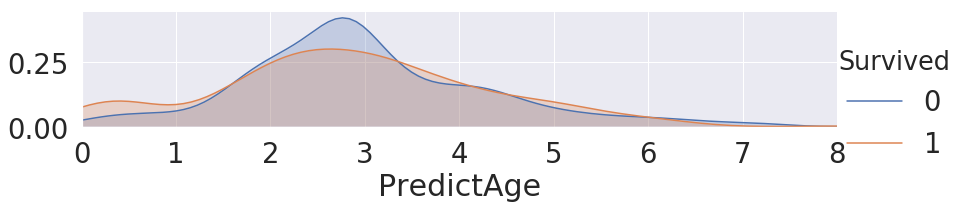

In [10]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'PredictAge',shade= True)
facet.set(xlim=(0, train['PredictAge'].max()))
facet.add_legend()
 
plt.show()

In [11]:
features_drop = ['Name', 'FirstName', 'SexName']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [12]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [13]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [15]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.83146067 0.76404494 0.7752809  0.83146067
 0.82022472 0.80898876 0.79775281 0.82022472]


In [16]:
# kNN Score
round(np.mean(score)*100, 2)

80.69

In [17]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.72222222 0.79775281 0.78651685 0.7752809  0.70786517 0.7752809
 0.76404494 0.78651685 0.78651685 0.7752809 ]


In [18]:
# decision tree Score
round(np.mean(score)*100, 2)

76.77

In [19]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.85393258 0.80898876 0.78651685 0.79775281 0.83146067
 0.78651685 0.7752809  0.78651685 0.85393258]


In [20]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.81

In [21]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.71910112 0.70786517 0.71910112 0.78651685
 0.76404494 0.79775281 0.83146067 0.78651685]


In [22]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

76.99

In [23]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.82022472 0.82022472 0.85393258 0.79775281
 0.82022472 0.84269663 0.80898876 0.86516854]


In [24]:
round(np.mean(score)*100,2)

82.6

In [25]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [26]:
import collections, numpy

collections.Counter(prediction)

Counter({0: 258, 1: 160})

In [27]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission2.csv', index=False)

In [28]:
submission = pd.read_csv('submission2.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [29]:
import os
print(os.listdir("../working"))

['__notebook__.ipynb', '__output__.json', 'submission2.csv']
